In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
tf.random.set_seed(3)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from collections import Counter

2024-05-18 16:06:03.727133: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 16:06:03.727261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 16:06:03.844181: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
!pip install split-folders

In [4]:
import splitfolders

data_dir = '/kaggle/input/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)'
output_dir = '/kaggle/working/splitted_Data'
splitfolders.ratio(data_dir, output=output_dir, seed=1337, ratio=(.8, 0.15, 0.05))

Copying files: 41793 files [07:18, 95.25 files/s] 


In [5]:
train_dir = "/kaggle/working/splitted_Data/train"
test_dir = "/kaggle/working/splitted_Data/test"
val_dir = "/kaggle/working/splitted_Data/val"

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_batches = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=True
)

Found 33434 images belonging to 2 classes.


In [8]:
test_batches = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary' ,
    shuffle=True
)

Found 2091 images belonging to 2 classes.


In [9]:
val_batches = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=True
)

Found 6268 images belonging to 2 classes.


In [10]:
train_class_indices = train_batches.class_indices
test_class_indices = test_batches.class_indices
val_class_indices = val_batches.class_indices

train_class_labels = train_batches.classes
test_class_labels = test_batches.classes
val_class_labels = val_batches.classes


train_class_counts = Counter(train_class_labels)
test_class_counts = Counter(test_class_labels)
val_class_counts = Counter(val_class_labels)

print("Class Names for train:\n", train_class_indices)
print("Class Counts for train:\n", train_class_counts)
print(end='\n')

print("Class Names for test:\n", test_class_indices)
print("Class Counts for test:\n", test_class_counts)
print(end='\n')

print("Class Names for validation :\n", val_class_indices)
print("Class Counts for validation:\n", val_class_counts)

Class Names for train:
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for train:
 Counter({0: 17878, 1: 15556})

Class Names for test:
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for test:
 Counter({0: 1118, 1: 973})

Class Names for validation :
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for validation:
 Counter({0: 3352, 1: 2916})


Pixels of the first image after Normalization: 

[[[0.7725491  0.7137255  0.654902  ]
  [0.7725491  0.7137255  0.654902  ]
  [0.7686275  0.70980394 0.6509804 ]
  ...
  [0.454902   0.37647063 0.3137255 ]
  [0.54901963 0.48627454 0.39607847]
  [0.6117647  0.54901963 0.454902  ]]

 [[0.77647066 0.7176471  0.65882355]
  [0.7725491  0.7137255  0.654902  ]
  [0.7686275  0.70980394 0.6509804 ]
  ...
  [0.3921569  0.32156864 0.25490198]
  [0.50980395 0.43921572 0.3647059 ]
  [0.58431375 0.5176471  0.43529415]]

 [[0.7725491  0.7137255  0.654902  ]
  [0.7725491  0.7137255  0.654902  ]
  [0.7686275  0.7137255  0.64705884]
  ...
  [0.2901961  0.227451   0.15686275]
  [0.4156863  0.3372549  0.26666668]
  [0.5294118  0.45098042 0.37647063]]

 ...

 [[0.7607844  0.79215693 0.8980393 ]
  [0.77647066 0.8078432  0.91372555]
  [0.7843138  0.81568635 0.9215687 ]
  ...
  [0.34509805 0.24313727 0.3137255 ]
  [0.34509805 0.25490198 0.32156864]
  [0.34117648 0.25490198 0.31764707]]

 [[0.7568628  0.78823537 

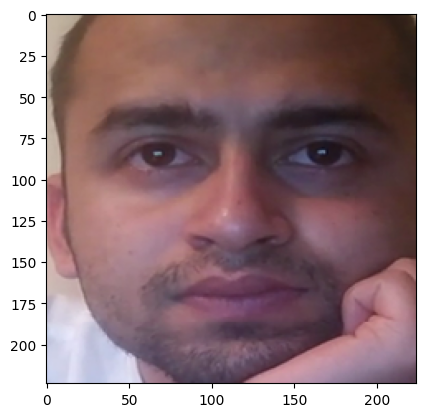

In [11]:
images, labels = next(train_batches)
print(f"Pixels of the first image after Normalization: \n\n{images[0]}") #print pixels of the first img
plt.imshow(images[0])
plt.show()

In [12]:
print(f"there are { images[0].ndim} Channels ")
print(f"image shape : {images[0].shape}")

there are 3 Channels 
image shape : (224, 224, 3)


In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(15, 30))
class_indices = train_batches.class_indices

for i in range(8):
    images, labels = next(train_batches)
    for j in range(4):
        
        ax = axes[i, j]
        ax.imshow(images[j])
        ax.axis('off')
        label = int(labels[j])  
        label_name = list(class_indices.keys())[list(class_indices.values()).index(label)]
        ax.set_title(f'{label_name} ({label})')

plt.tight_layout()
plt.show()

In [ ]:
image_size = (224, 224)

In [15]:
base_model = MobileNetV2(
    weights='imagenet', 
    include_top=False, 
    input_shape=(image_size[0], image_size[1], 3),
)

In [16]:
type(base_model)

keras.src.models.functional.Functional

In [17]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [18]:
model=keras.Sequential() #empty

In [19]:
for layer in base_model.layers[:-25] :
    layer.trainable = False

In [20]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

In [21]:
model = Model(inputs=base_model.input, outputs=predictions)

In [22]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 67,010,114 (255.62 MB)

 Trainable params: 66,114,050 (252.21 MB)

 Non-trainable params: 896,064 (3.42 MB)

In [23]:
model.compile(optimizer=Adam(0.0001 ), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(
   train_batches,
    epochs=10,
    validation_data=val_batches,
    batch_size=32
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   3/2090 ━━━━━━━━━━━━━━━━━━━━ 1:33 45ms/step - accuracy: 0.4549 - loss: 3.4507   

I0000 00:00:1716048859.714898     140 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716048859.754723     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2089/2090 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9799 - loss: 0.0952

W0000 00:00:1716048987.439694     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2090/2090 ━━━━━━━━━━━━━━━━━━━━ 172s 73ms/step - accuracy: 0.9799 - loss: 0.0952 - val_accuracy: 0.9982 - val_loss: 0.0064
Epoch 2/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 137s 65ms/step - accuracy: 0.9987 - loss: 0.0068 - val_accuracy: 0.9962 - val_loss: 0.0346
Epoch 3/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 137s 65ms/step - accuracy: 0.9971 - loss: 0.0160 - val_accuracy: 1.0000 - val_loss: 1.4779e-06
Epoch 4/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 133s 63ms/step - accuracy: 0.9994 - loss: 0.0054 - val_accuracy: 0.9997 - val_loss: 0.0067
Epoch 5/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 136s 65ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 1.1677e-04
Epoch 6/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 136s 65ms/step - accuracy: 0.9992 - loss: 0.0064 - val_accuracy: 0.9998 - val_loss: 7.0598e-04
Epoch 7/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 135s 64ms/step - accuracy: 1.0000 - loss: 3.5366e-06 - val_accuracy: 0.9998 - val_loss: 0.0029
Epoch 8/10
2090/2090 ━━━━━━━━━━━━━━━━━━━━ 134s 64ms/step - accur

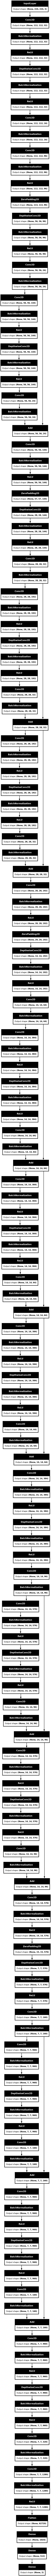

In [25]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [26]:
loss, accuracy = model.evaluate(train_batches)

print(f"Training Loss: {loss:.4f}")
print(f"Training Accuracy: {accuracy*100:.2f}%")

2090/2090 ━━━━━━━━━━━━━━━━━━━━ 112s 54ms/step - accuracy: 0.9994 - loss: 0.0032
Training Loss: 0.0024
Training Accuracy: 99.95%


In [27]:
loss, accuracy = model.evaluate(test_batches)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

  3/131 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 1.0000 - loss: 0.0000e+00

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.9996 - loss: 0.0082
Test Loss: 0.0202
Test Accuracy: 99.90%


In [28]:
y_pred = model.predict(test_batches)

y_pred_labels = np.argmax(y_pred, axis=1)

  5/131 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step

W0000 00:00:1716050348.574669     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step


In [29]:
y_actual = test_batches.labels

In [30]:
conf_matrix = confusion_matrix(y_actual, y_pred_labels)

print(conf_matrix)

[[572 546]
 [544 429]]


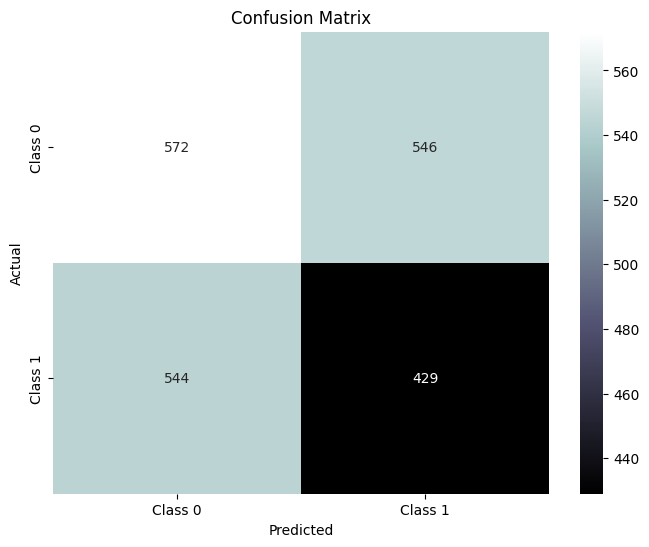

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
report = classification_report(y_actual, y_pred_labels,digits=5)
print(report)

              precision    recall  f1-score   support

           0    0.51254   0.51163   0.51209      1118
           1    0.44000   0.44090   0.44045       973

    accuracy                        0.47872      2091
   macro avg    0.47627   0.47627   0.47627      2091
weighted avg    0.47879   0.47872   0.47875      2091



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 2 neurons for binary classification

# Combine base model and custom layers into a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary


# Define data generators
image_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data
train_data_loader = image_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),  # ResNet50 input size
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Load validation data
val_data_loader = image_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Train the model
history = model.fit(
    train_data_loader,
    validation_data=val_data_loader,
    epochs=10,
)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(val_data_loader, verbose=2)

# Print evaluation metrics
print('\nTest accuracy:', test_acc)




# Plot confusion matrix
confusion_mtx = confusion_matrix(true_labels, test_pred_classes)
print(confusion_mtx)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(val_data_loader.class_indices))
plt.xticks(tick_marks, val_data_loader.class_indices, rotation=45)
plt.yticks(tick_marks, val_data_loader.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 33435 images belonging to 2 classes.
Found 8358 images belonging to 2 classes.
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1045/1045 ━━━━━━━━━━━━━━━━━━━━ 555s 516ms/step - accuracy: 0.5864 - loss: 0.6760 - val_accuracy: 0.6407 - val_loss: 0.6370
Epoch 2/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 526s 501ms/step - accuracy: 0.6463 - loss: 0.6268 - val_accuracy: 0.6634 - val_loss: 0.6532
Epoch 3/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 523s 498ms/step - accuracy: 0.6837 - loss: 0.5940 - val_accuracy: 0.6466 - val_loss: 0.6712
Epoch 4/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 520s 495ms/step - accuracy: 0.6976 - loss: 0.5739 - val_accuracy: 0.6500 - val_loss: 0.6775
Epoch 5/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 522s 497ms/step - accuracy: 0.7241 - loss: 0.5402 - val_accuracy: 0.6263 - val_loss: 0.7005
Epoch 6/10
 185/1045 ━━━━━━━━━━━━━━━━━━━━ 5:43 399ms/step - accuracy: 0.7399 - loss: 0.5287